In [3]:
from dqnotebook import QuadraticDrawer
%matplotlib notebook
import matplotlib as mpl
#mpl.use("pgf")
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from scipy.integrate import odeint
import sys
import numpy as np
from cmath import *
from obj import Monodromy, QuadraticDifferential

In [378]:
lim = 30
maxreps = 50000
maxint = 100
t= np.linspace(0,.5,2) #intervalo temporal
densidadPuntos=.3
normav = 0.001
ri=sqrt(1j)
ric=sqrt(-1j)

In [160]:
class TrajectorySolver:
    """clase que representa una trayectoria y los metodos para calcularla"""

    def __init__(self, quad, plotpoint, phase = None):
        self.qd = quad
        if phase: self._phase = phase
        else: self._phase = quad.phase
        self.plotpoint = plotpoint
        self.first = plotpoint
        self.last = plotpoint
        self.first_mon = Monodromy(quad(plotpoint).conjugate())
        self.last_mon = Monodromy(quad(plotpoint).conjugate())
        self.coordinates = np.array([[plotpoint.real, plotpoint.imag]])

    def __call__(self):
        if self.first == self.last:
            self.tp()
            self.tn()
            sys.stdout.write(".")
            sys.stdout.flush()
        return self.coordinates

    def traject(self, sign, mon, z):
        norma = 0.5
        coord = np.array([[z.real, z.imag]])
        rep = 0
        fin = z
        inicio = z
        ultimo = z
        start = z
        longitud = 0.0
        F = lambda y,t,mono: [sign*self.f(y,t,mono)[0],sign*self.f(y,t,mono)[1],normav*abs(sqrt(self.qd.QD(complex(y[0],y[1]))))]
#        F = lambda y,t,mono: [sign*self.f(y,t,mono)[0],sign*self.f(y,t,mono)[1],normav]
        while (self.qd.close_2pole(fin) and self.qd.close_2smplpole(fin) and norma < lim and rep < maxreps):
            sol = odeint(F, [inicio.real, inicio.imag, longitud], t, mxstep = maxint, args=(mon,))
            fin = complex(sol[-1,0], sol[-1,1])
            mon(self.qd(fin).conjugate())
            longitud = sol[-1,2]
            if densidadPuntos < longitud:
                coord = np.append(coord, np.array([[fin.real, fin.imag]]), axis = 0)
                longitud=0
                #ultimo = fin
            inicio = fin
            norma = abs(inicio)
            if 50 < rep and 0.01 > abs(fin-start):
                break
            rep += 1
        return coord

    def tp(self):
        self.coordinates = np.vstack((self.coordinates,  self.traject(1, self.last_mon, self.last)))
        self.last=complex(self.coordinates[-1][0], self.coordinates[-1][1])
        return

    def tn(self):
        self.coordinates = np.vstack((self.traject(-1, self.first_mon, self.first)[::-1], self.coordinates))
        self.first=complex(self.coordinates[0][0], self.coordinates[0][1])
        return

    def f(self, y, t, mono):
        x = y[0]
        y = y[1]
        z = mono.dist(self.qd(complex(x,y)).conjugate())
        z *= normav
        if abs(complex(x, y)) > 1:
            z *= abs(complex(x,y))
        return [z.real, z.imag]
   

In [379]:
quad=QuadraticDifferential()

<IPython.core.display.Javascript object>


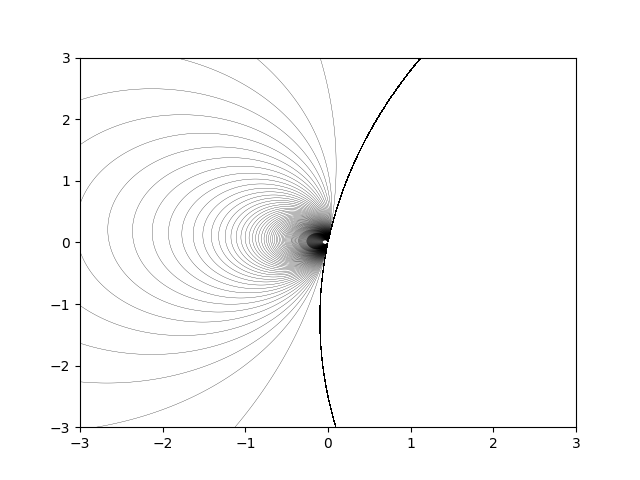

In [380]:
fig9=plt.figure()

In [381]:
quad_drawer9=QuadraticDrawer(quad,fig9)

In [382]:
#quad.zeros=[complex(0,0)]
quad.phase=-1
quad.dblpoles = [complex(0,0),complex(0,0)]

In [389]:
solver=TrajectorySolver(quad,rect(2.5,-pi/2))

In [390]:
puntos = solver()

.

In [286]:
for x in range(puntos.shape[0]):
    plt.plot([puntos[x][0]],[puntos[x][1]],'ro')

In [385]:
puntos.shape[0]

133

In [391]:
for x in range(puntos.shape[0]):
    quad.add_plotpoint(complex(puntos[x][0],puntos[x][1]))

In [392]:
quad.phase=rect(1,pi*.9)

In [393]:
quad_drawer9.draw_trajectories()

........................................................................................................................................................................................................................................................................
